In [1]:
import numpy as np
import pyccl as ccl
import cluster_toolkit as ct

In [2]:
import sys
sys.path.append('./support')
sys.path.append('../clmm')
import modeling as pp

In [3]:
# Select density profile and profile parametrization options 
density_profile_parametrization = 'nfw'
mass_Delta = 200
cluster_mass = 1.e15
cluster_concentration = 4

# Define a CCL-like cosmology object from astropy cosmology
# This is so that the monkey-patches for cosmological distances in modeling.py work OK
# cosmo_ccl = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)


from astropy.cosmology import FlatLambdaCDM
astropy_cosmology_object = FlatLambdaCDM(H0=70, Om0=0.27, Ob0=0.045)
cosmo_ccl = pp._cclify_astropy_cosmo(astropy_cosmology_object)
cosmo_ccl = astropy_cosmology_object

In [4]:
type(cosmo_ccl)

astropy.cosmology.core.FlatLambdaCDM

**Note:  We have decided to use:**

- get_ to signal easy to pull values based on cosmology.
- compute_ to signal things in the background (integration, etc. to get normalization right).
- calculate_ to signal quick derived values based on things that were computed.

In [5]:
# Quick test of functions

r3d = np.logspace(-2, 2, 100)

In [6]:
rho = pp.get_3d_density(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, cosmo=cosmo_ccl)

In [7]:
Sigma = pp.predict_surface_density(r3d, cluster_mass, cluster_concentration, cosmo=cosmo_ccl, Delta=200, 
                                  halo_profile_parameterization='nfw')

In [8]:
DeltaSigma = pp.predict_excess_surface_density(r3d, cluster_mass, cluster_concentration, cosmo=cosmo_ccl, Delta=200, 
                                              halo_profile_parameterization='nfw')

In [9]:
Sigmac = pp.get_critical_surface_density(cosmo_ccl, z_cluster=1.0, z_source=2.0)

1241373844.990499 1177679548.853156 456254145.7550617 3841.8383445653494


In [10]:
gammat = pp.predict_tangential_shear(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, z_cluster=1.0, 
                                          z_source=2.0, cosmo=cosmo_ccl, Delta=200, 
                                          halo_profile_parameterization='nfw', z_src_model='single_plane')

1241373844.990499 1177679548.853156 456254145.7550617 3841.8383445653494


In [11]:
kappa = pp.predict_convergence(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                            z_cluster=1.0, z_source=2.0,
                                 cosmo=cosmo_ccl, Delta=200, 
                                     halo_profile_parameterization='nfw', 
                                    z_src_model='single_plane')

1241373844.990499 1177679548.853156 456254145.7550617 3841.8383445653494


In [12]:
gt = pp.predict_reduced_tangential_shear(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                                         z_cluster=1.0, z_source=2.0, cosmo=cosmo_ccl, Delta=200, 
                                         halo_profile_parameterization='nfw', z_src_model='single_plane')
        

1241373844.990499 1177679548.853156 456254145.7550617 3841.8383445653494
1241373844.990499 1177679548.853156 456254145.7550617 3841.8383445653494


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_profile(r, profile_vals, profile_label='rho'):
    plt.loglog(r, profile_vals)
    plt.xlabel('r [Mpc]', fontsize='xx-large')
    plt.ylabel(profile_label, fontsize='xx-large')

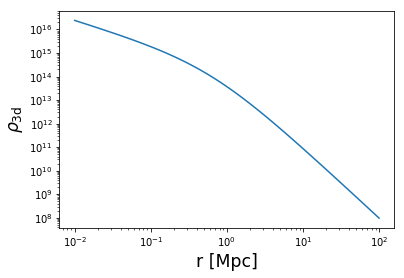

In [14]:
plot_profile(r3d, rho, '$\\rho_{\\rm 3d}$')

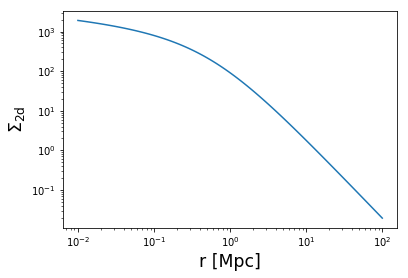

In [15]:
plot_profile(r3d, Sigma, '$\\Sigma_{\\rm 2d}$')

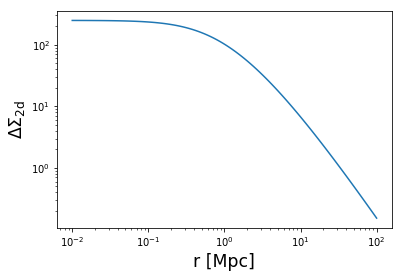

In [16]:
plot_profile(r3d, DeltaSigma, '$\\Delta\\Sigma_{\\rm 2d}$')

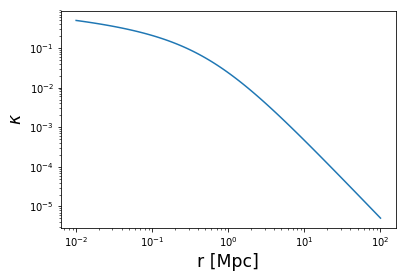

In [17]:
plot_profile(r3d, kappa, '$\\kappa$')
# Note - here is clear units problem

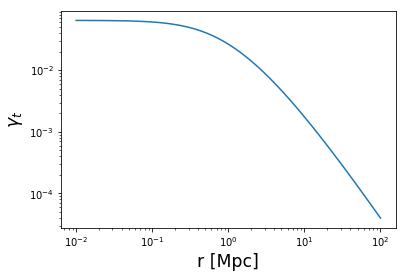

In [18]:
plot_profile(r3d, gammat, '$\\gamma_t$')

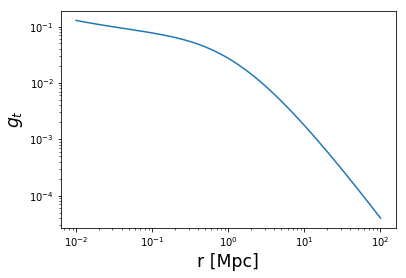

In [19]:
plot_profile(r3d, gt, '$g_t$')